# Python: collusion with Cournot competition

In the lecture, we considered collusion with Bertrand competition. Here we are going to consider the case where firms without collusion compete in quantities, that is Cournot competition. 

Here we consider collusion in a Cournot duopoly market. We use markdown to explain what we do in the code. 

First, we import some libraries that we will use:

In [1]:
from scipy import optimize,arange
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

## demand and costs

We define a linear demand curve, $p_i(x_i,x_j) = 1- x_i - b x_j$ where $b \in \langle 0,1]$ determines the elasticity of substitution between the goods. With $b=1$ the goods are perfect substitutes, with $b<1$ the goods are differentiated.

We assume constant marginal costs, that is total costs are given by $c(x)=cx$. If we would like to introduce a fixed cost, $c(x) = cx+f$ for some $f>0$ we need to say explicitly that $c(0)=0$: if the firm is not active, it does not incur the fixed cost. For this we use the `if`-statement below in the definition of the function `cost(x,c)`.

Note that `demand` is defined for the firm indexed as 1 with the other firm indexed as 2.

When we do the math, we write $p_i(x_i,x_j)$ without mentioning that $b$ is a parameter as well. We could do the same in Python, but then it is not so straightforward to change $b$ later on. Therefore the function `demand` is written as a function of $b$ explicitly.

In [2]:
def demand(x1,x2,b):
    return 1-x1-b*x2

def cost(x,c):
    if x == 0:
     cost = 0
    else:
     cost = c*x
    return cost

## profits

With demand and costs, we can define profits as 
$$
\pi(x_i,x_j) = p_i(x_i,x_j)x_i-c(x_i)
$$


In [3]:
def profit(x1,x2,c1,b):
    return demand(x1,x2,b)*x1-cost(x1,c1)

## reaction functions

Under Cournot competition, firm $i$ chooses $x_i$ to maximize profits, taking $x_2$ as given. That is, $x_1^*,x_2^*$ is a Nash equilibrium if and only if

$$
x_i^* = \arg\max_{x_i} \pi(x_i,x_j^*)
$$

for each $i \neq j \in \{1,2\}$. 

Hence, we first determine what the optimal output level of one firm is, given the choice $x_2$ of the other firm. The function `reaction` does exactly that. When we do this in an exercise, we take the first order condition. That is, we calculate the Nash equilibrium as the solution $x_1^*,x_2^*$ to 

$$
\left. \frac{\partial \pi(x_i,x_j)}{\partial x_i} \right|_{x_i=x_i^*,x_j=x_j^*} = 0
$$

provided that $\pi$ is concave in $x_i$. So one way to go is to let Python calculate the derivative and solve this equation for each firm. However, Python (in particular, the scipy-library) can also directly look for the profit maximizing outcome. Below we use the function `brute` to look for the global maximum of $\pi$. In principle, the first derivative may give us a local maximum but not the global one. In particular, if $f>0$ it may be the case that $x_i^*=0$ (one firm is not active), while the first order condition gives $x_i^* >0$ (but with negative profits).

The [scipy optimize](http://docs.scipy.org/doc/scipy-0.14.0/reference/optimize.html) library has a number of routines to optimize functions. They are all defined as minimization problems. So if we want to maximize a function $f(x)$, we need to minimize $-f(x)$. 

In [1]:
def reaction(x2,c1,b):
    x1 = optimize.brute(lambda x: -profit(x,x2,c1,b), ((0,1,),)) # brute minimizes the function;
                                                                 # when we minimize -profits, we maximize profits
    return x1[0]

## equilibrium as fixed point

To find an equilibrium, we are looking for a (so called) fixed point. That is, we have a function $f(x)$ and look for the point where $x = f(x)$. In this case, $x$ and $f$ are two dimensional vectors. 

Let $r_i(x_j)$ denote firm $i$'s optimal response to $j$'s output level $x_j$. Then we need to find a point such that

$$
\pmatrix{x_1^* \\ x_2^*} = \pmatrix{r_1(x_2^*) \\ r_2(x_1^*)}
$$

Defining the vector function $f(x_1,x_2)$ as

$$
f(x) = \pmatrix{r_1(x_2^*) \\ r_2(x_1^*)}
$$

we are looking for a point $x^*=(x_1^*,x_2^*)$ such that $x^*=f(x^*)$.

The function `vector_reaction` is defined as $x-f(x)$ in this notation. Hence, to find the fixed point, we are looking for $x^*$ such that `vector_reaction` $= 0$; or put differently, $x^*-f(x^*)=0$.

We pass $b,c_1,c_2$ as a vector of parameters `param` $= [b, c_1, c_2]$.

In [5]:
def vector_reaction(x,param): # vector param = (b,c1,c2)
    return array(x)-array([reaction(x[1],param[1],param[0]),reaction(x[0],param[2],param[0])])

## Cournot equilibrium

Let's calulate the Cournot equilibrium in case both firms have zero costs ($c=0$) and they produce homogeneous goods ($b=1$). We use the routine `fsolve` (again from `scipy.optimize`) to find $x$ where `vector_reaction` $=0$. That is, `fsolve` finds the point of a function where it equals 0. We need to give `fsolve` an initial guess $x_0$. Further, we pass the paramter vector `param` as arguments (`args`) to `fsolve`.

In [6]:
param = [1.0,0.0,0.0]
x0 = [0.3, 0.3]

ans = optimize.fsolve(vector_reaction, x0, args = (param))
print ans

[ 0.33332648  0.33332648]


The variable `ans` contains the values of $x_1,x_2$ for which `vector_reaction` $=0$. 

You can see that we are dealing with numerical procedures here. 

* What is the Cournot equilibrium exactly in this case? Although what we find is (very) close, it is not exact!

We denote the symmetric Cournot equilibrium by $x^*$.

## collusion

We want to understand what the industry profits are if the firms collude on output levels $x_1,x_2$. To simplify, we focus on the case where firms are symmetric $c_1 = c_2 =c$. Further, the firms collude on symmetric output $x_1=x_2=x$. We plot industry profits $\pi(x,x)+\pi(x,x)=2\pi(x,x)$ as a function of $x$, where we check whether $x$ can be sustained under collusion. 

As we saw in the lecture, the condition for $x$ to be sustained as a collusive outcome is given by

$$
\pi(x,x) \frac{1}{1-\delta} \geq \max_{\hat x} \pi(\hat x,x) + \frac{\delta}{1-\delta} \pi(x^*,x^*) 
$$

where $\delta \in [0,1]$ denotes the discount factor, $x^*$ denotes the Nash equilibrium output level and $\hat x$ denotes the firm's optimal response to its opponent choosing output level $x$.

* Check that we can rewrite this inequality as:

$$
\pi(x,x) \geq (1-\delta) \max_{\hat x} \pi(\hat x,x) + \delta \pi(x^*,x^*) 
$$

* Check that $x=x^*$ satisfies this inequality. What is the interpretation of this?

Hence the function `collusion_profits` can be defined as follows:

In [7]:
def collusion_profits(x,b,c,delta): # we only do this for the symmetric case: c1 = c2 = c
    profits = profit(x,x,c,b)
    ans = optimize.fsolve(vector_reaction, x0, args = ([b,c,c]))
    if profits >= (1-delta)*profit(reaction(x,c,b),x,c,b)+delta*profit(ans[0],ans[1],c,b):
        industry_profits = 2*profits # profits can be sustained as collusion profits
    else:
        industry_profits = 0 # profits cannot be sustained as collusion profits
    return industry_profits


Note that profits $=0$ when collusion cannot be sustained. This is just to signal (in the graph) where collusion breaks down. It is not a prediction of the collusion profits. Indeed, if parties collude, they will choose $x$ to maximize their profits.

The next graph shows collusion profits for the case where $b=1.0,c_1=c_2=0.0$ and two values for $\delta$. 

* When $\delta$ is high enough (0.8 in this case), for which $x$ are profits maximized? 
* What is the interpretation of this $x$?

When $\delta$ is low (0.3), collusion profits are lower (and output is higher).

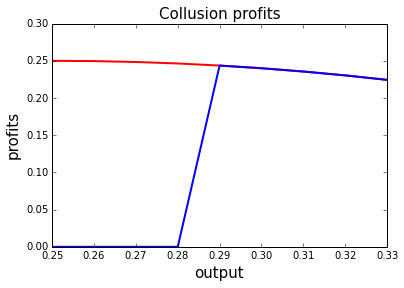

In [12]:
range_x = arange(0.25,ans[0],0.01)
delta1 = 0.8
delta2 = 0.3
range_profits = [collusion_profits(x,1.0,0.0,delta1) for x in range_x]
range_profits2 = [collusion_profits(x,1.0,0.0,delta2) for x in range_x]

plt.clf()
 
plt.plot(range_x, range_profits,'-', color = 'r', linewidth = 2)
plt.plot(range_x, range_profits2,'-', color = 'b', linewidth = 2)
plt.title("Collusion profits",fontsize = 15)
plt.xlabel("output",fontsize = 15)
plt.ylabel("profits",fontsize = 15,rotation = 90)
plt.xlim(0.25,0.33)
plt.ylim(0.0,0.3)
plt.savefig('collusion.png')

## imperfect substitutes

Exercise: plot profits for the case where $b = 0.5$, that is goods are imperfect substitutes.

* Why are collusion profits maximized for higher $x$ in this case?